# DATA SCIENCE INTERN AT LETSGROWMORE


# Name: Pavankumar P


# Task: Exploratory Data Analysis on Dataset-Terrorism (Intermediate Level)

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv',low_memory=False)

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
data.shape

(181691, 135)

In [6]:
data.size

24528285

In [7]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
# Renaming column Names

data.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'}, inplace=True)


In [10]:
# Removing Unnecessary Data

data=data[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [13]:
data.describe()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [14]:
data['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Middle East & North Africa'),
  Text(1, 0, 'South Asia'),
  Text(2, 0, 'South America'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Western Europe'),
  Text(5, 0, 'Southeast Asia'),
  Text(6, 0, 'Central America & Caribbean'),
  Text(7, 0, 'Eastern Europe'),
  Text(8, 0, 'North America'),
  Text(9, 0, 'East Asia'),
  Text(10, 0, 'Central Asia'),
  Text(11, 0, 'Australasia & Oceania')])

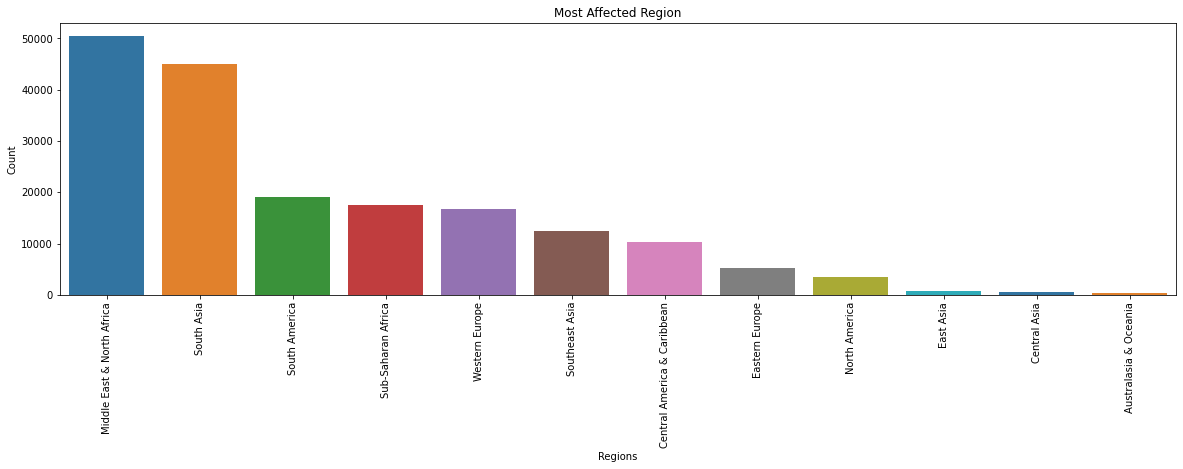

In [17]:
plt.figure(figsize = (20,5))
sns.barplot(data['Region'].value_counts()[:15].index,data['Region'].value_counts()[:15].values,palette='tab10')
plt.title('Most Affected Region')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation = 90)

([<matplotlib.axis.XTick at 0x12fb87f3850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

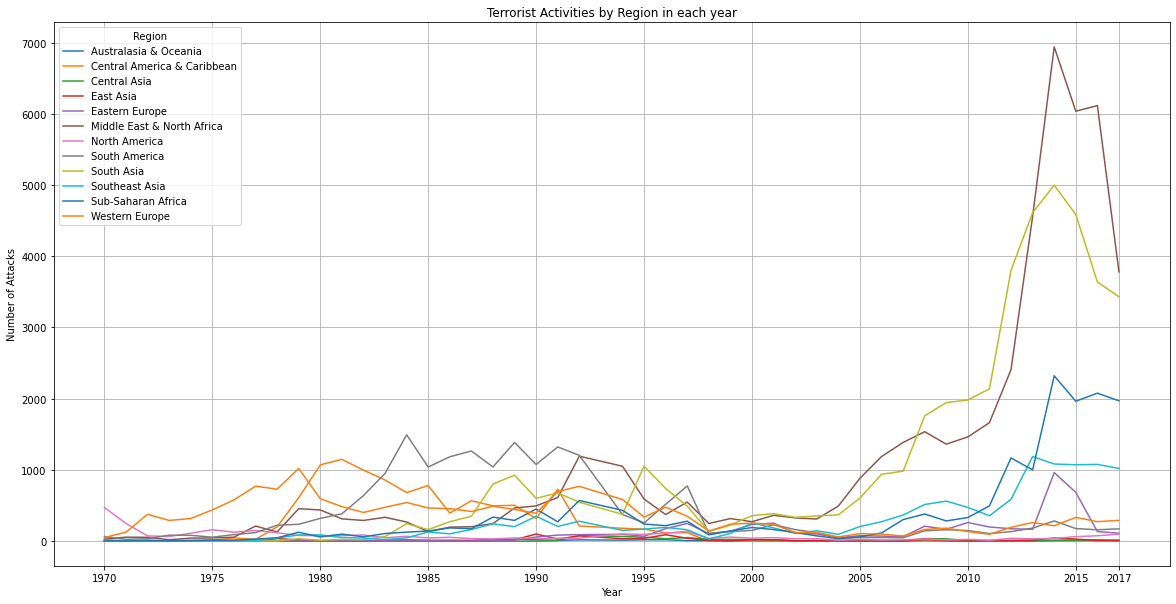

In [16]:
pd.crosstab(data.Year, data.Region).plot(kind='line',figsize=(20,10))
plt.title('Terrorist Activities by Region in each year')
plt.ylabel('Number of Attacks')
plt.grid()
plt.xticks([1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2017])

# Conclusion:- 



# Most Affected Region->Middle East & North Africa

# Least Affected Region->Australasia & Oceania

# Top 10 Affected Countries:

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'Afghanistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Colombia'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'El Salvador'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Turkey')])

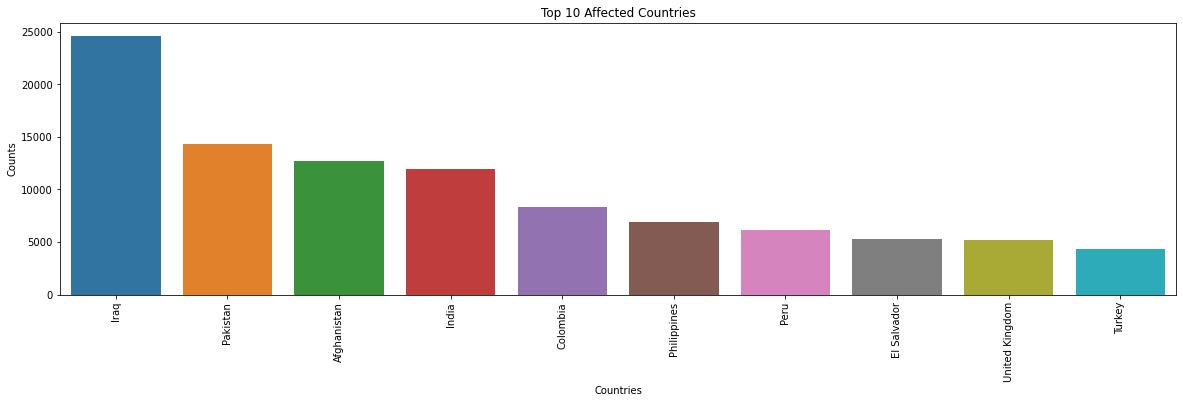

In [18]:
plt.figure(figsize = (20,5))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values)
plt.title('Top 10 Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

# Conclusion: Most Affected Country-> Iraq

In [19]:
# Overall States
data['State'].value_counts()

Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
North SInai                 1
Szczecin                    1
Kofarnihon (District)       1
Paijanne Tavastia           1
Yamagata                    1
Name: State, Length: 2854, dtype: int64

Text(0, 0.5, 'Counts')

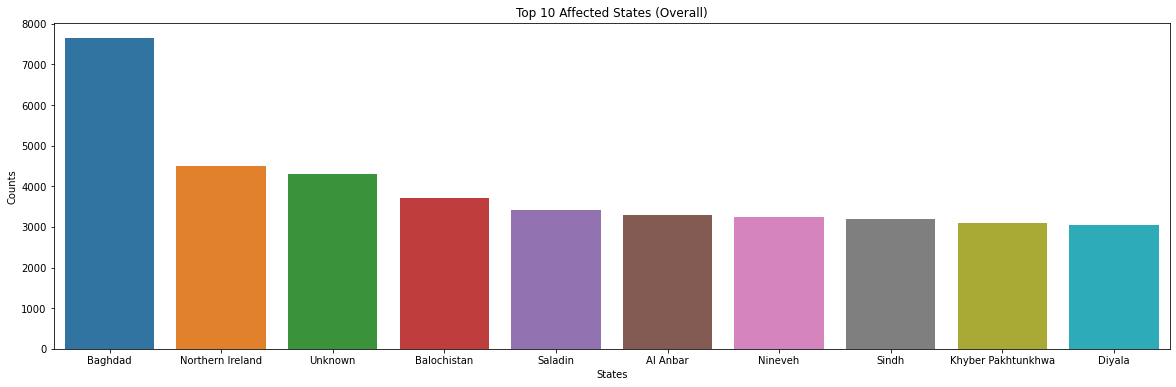

In [21]:
plt.figure(figsize = (20,6))
sns.barplot(data['State'].value_counts()[:10].index,data['State'].value_counts()[:10].values)
plt.title('Top 10 Affected States (Overall)')
plt.xlabel('States')
plt.ylabel('Counts')


# Conclusion: Most Affected state = Baghdad

## in India

In [22]:
# States of India
df_istates=data[data['Country']=='India']['State']
df_istates.value_counts()

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Meghalaya             294
Andhra Pradesh        251
Orissa                221
Delhi                 208
Uttar Pradesh         201
Tamil Nadu            164
Unknown               157
Tripura               117
Nagaland              115
Kerala                 98
Gujarat                85
Madhya Pradesh         75
Karnataka              71
Haryana                50
Chandigarh             47
Rajasthan              43
Andhra pradesh         41
Mizoram                27
Uttaranchal            24
Himachal Pradesh       24
Arunachal Pradesh      24
Telangana              24
Goa                     5
Sikkim                  4
Puducherry              2
Name: State, dtype: int64

Text(0, 0.5, 'Counts')

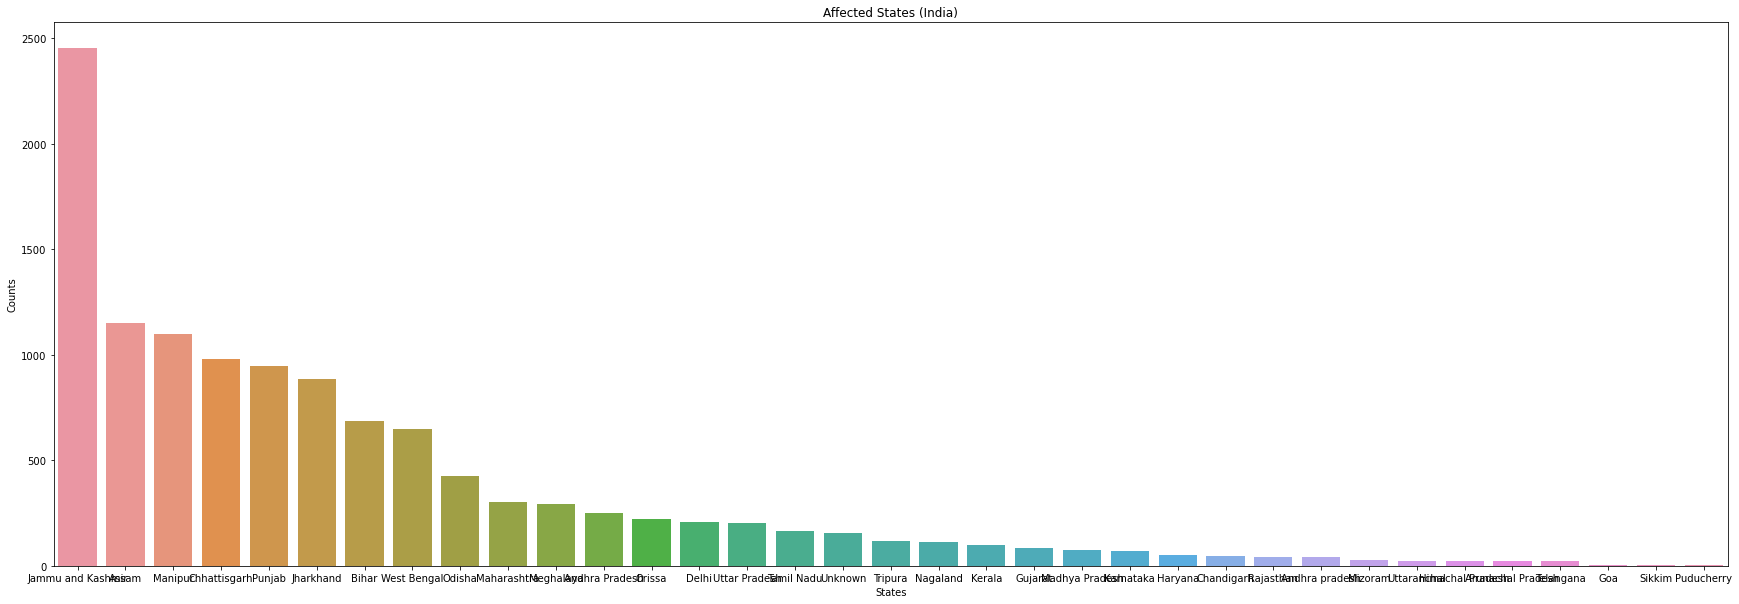

In [36]:
plt.figure(figsize = (30,10))
sns.barplot(df_istates.value_counts()[:].index,df_istates.value_counts()[:].values)
plt.title('Affected States (India)')
plt.xlabel('States')
plt.ylabel('Counts')

# Conclusion :


# Most Affected state in India = Jammu and Kashmir

# Least Affected state in India = Puducherry

# Pakistan

In [30]:

df_astates=data[data['Country']=='Pakistan']['State']
df_astates.value_counts()

Balochistan                            3710
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Federally Administered Tribal Areas    2392
North-West Frontier Province            866
Punjab                                  829
Islamabad Capital Territory             154
Unknown                                  49
Gilgit-Baltistan                         47
Azad Kashmir                             30
SIndh                                     1
Name: State, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Balochistan'),
  Text(1, 0, 'Sindh'),
  Text(2, 0, 'Khyber Pakhtunkhwa'),
  Text(3, 0, 'Federally Administered Tribal Areas'),
  Text(4, 0, 'North-West Frontier Province'),
  Text(5, 0, 'Punjab'),
  Text(6, 0, 'Islamabad Capital Territory'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Gilgit-Baltistan'),
  Text(9, 0, 'Azad Kashmir'),
  Text(10, 0, 'SIndh')])

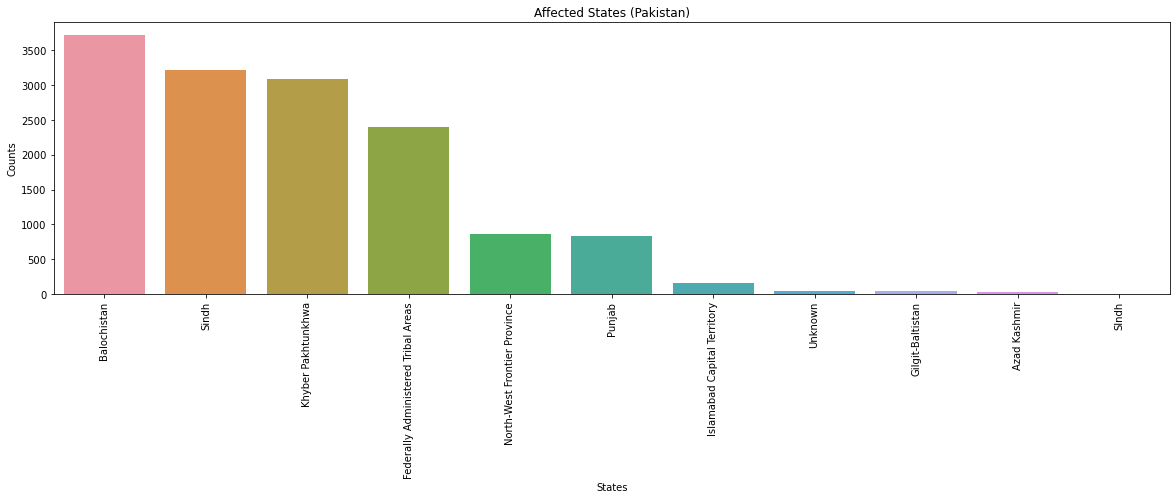

In [37]:
plt.figure(figsize = (20,5))
sns.barplot(df_astates.value_counts()[:].index,df_astates.value_counts()[:].values)
plt.title('Affected States (Pakistan)')
plt.xlabel('States')
plt.ylabel('Counts')
plt.xticks(rotation = 90)

# Conclusion: 



# Most Affected state in Pakistan = Balochistan

# Least Affected state in Pakistan = SIndh

# Number of Terrorist Activities in each Year

In [38]:
data['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

Text(0, 0.5, 'Counts')

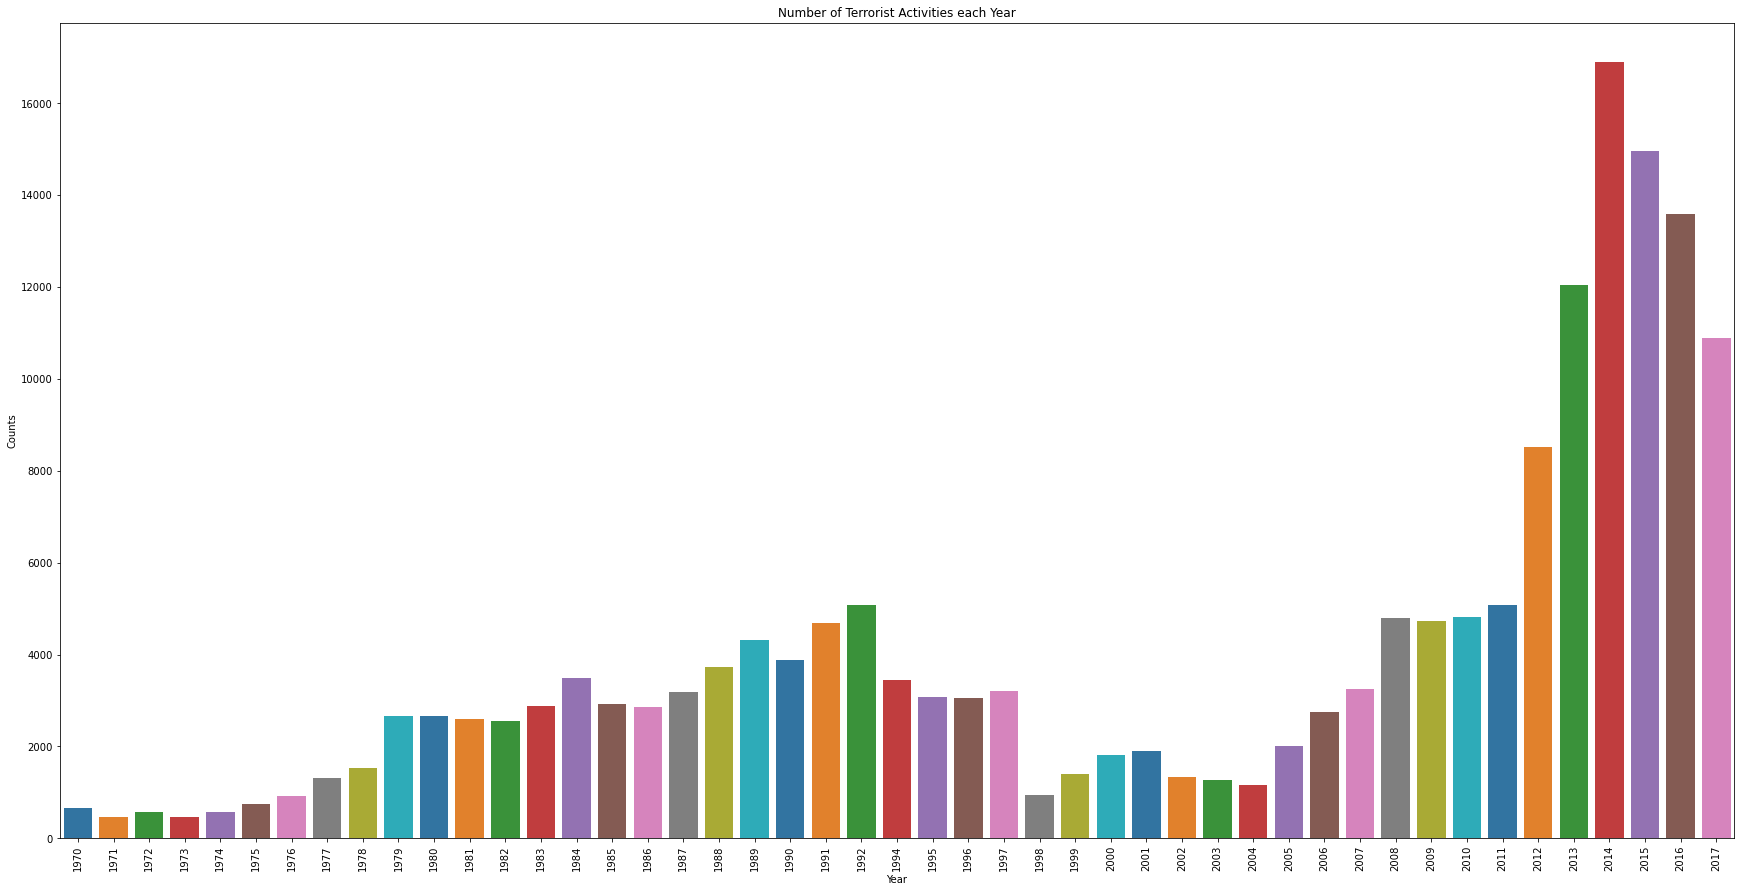

In [39]:
plt.figure(figsize = (30,15))
sns.countplot('Year',data=data,palette='tab10')
plt.xticks(rotation = 90)
plt.title('Number of Terrorist Activities each Year')
plt.xlabel('Year')
plt.ylabel('Counts')

# Conclusion

# Highest number of attacks -- 2014


# Lowest number of attacks -- 1971

# Attack Methods

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Bombing/Explosion'),
  Text(1, 0, 'Armed Assault'),
  Text(2, 0, 'Assassination'),
  Text(3, 0, 'Hostage Taking (Kidnapping)'),
  Text(4, 0, 'Facility/Infrastructure Attack'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'Unarmed Assault'),
  Text(7, 0, 'Hostage Taking (Barricade Incident)'),
  Text(8, 0, 'Hijacking')])

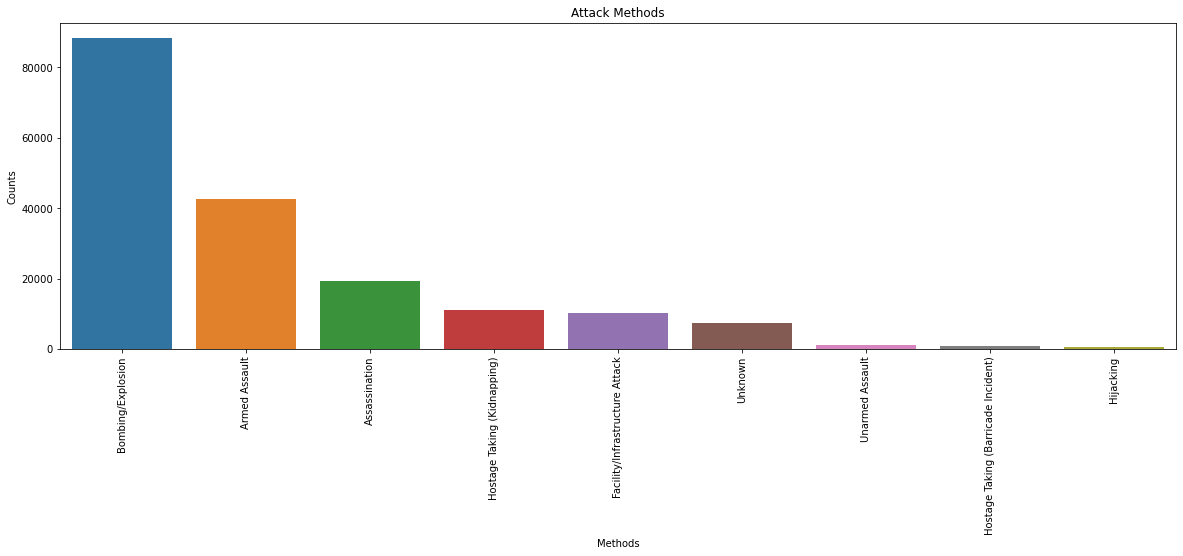

In [44]:
plt.figure(figsize = (20,6))
sns.countplot(data['AttackType'],order = data['AttackType'].value_counts().index,palette='tab10')
plt.title('Attack Methods')
plt.xlabel('Methods')
plt.ylabel('Counts')

plt.xticks(rotation = 90)

# Conclusion



# Least of the attack types= Hijacking

# Most of the attack types = Bombing/Explosion

# Target Types

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Private Citizens & Property'),
  Text(1, 0, 'Military'),
  Text(2, 0, 'Police'),
  Text(3, 0, 'Government (General)'),
  Text(4, 0, 'Business'),
  Text(5, 0, 'Transportation'),
  Text(6, 0, 'Utilities'),
  Text(7, 0, 'Unknown'),
  Text(8, 0, 'Religious Figures/Institutions'),
  Text(9, 0, 'Educational Institution'),
  Text(10, 0, 'Government (Diplomatic)'),
  Text(11, 0, 'Terrorists/Non-State Militia'),
  Text(12, 0, 'Journalists & Media'),
  Text(13, 0, 'Violent Political Party'),
  Text(14, 0, 'Airports & Aircraft'),
  Text(15, 0, 'Telecommunication'),
  Text(16, 0, 'NGO'),
  Text(17, 0, 'Tourists'),
  Text(18, 0, 'Maritime'),
  Text(19, 0, 'Food or Water Supply'),
  Text(20, 0, 'Abortion Related'),
  Text(21, 0, 'Other')])

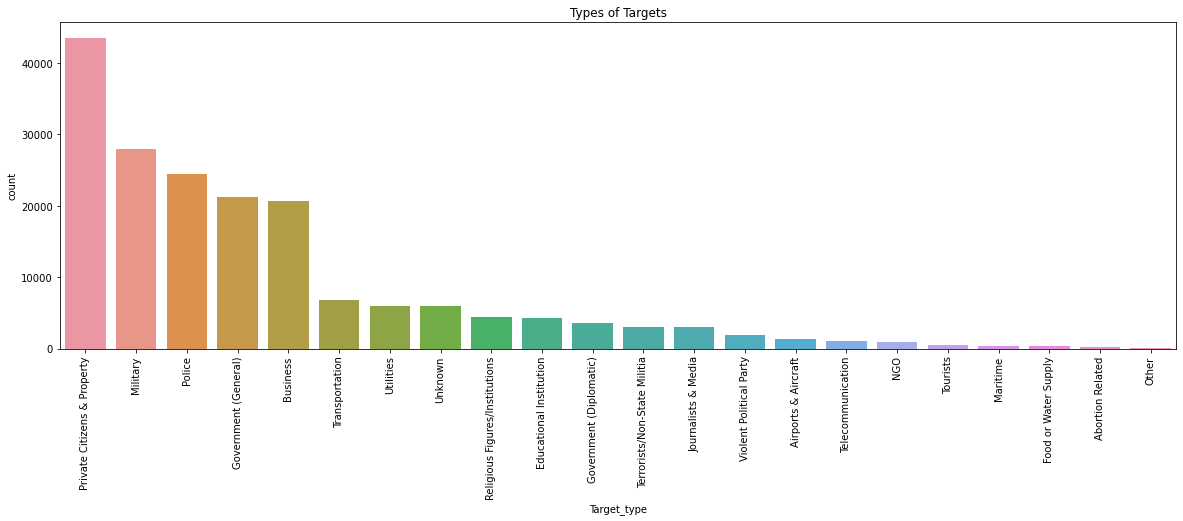

In [49]:
plt.figure(figsize = (20,6))
sns.countplot(x="Target_type", data=data, order=data["Target_type"].value_counts().index)
plt.title('Types of Targets')
plt.xticks(rotation = 90)

# Most Target type = Private Citizens & Property

# Frequent Groups Invloved in Terrorist Activity

In [46]:
data['Group'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Anti-Liberal extremists                                 1
State Council of Indian and Peasant Organization        1
Commando Internacionalista Simon Bolivar                1
Croatian Liberation Army                                1
France's Honour                                         1
Name: Group, Length: 3537, dtype: int64

Text(0.5, 1.0, 'Most Active Terrorist Organizations')

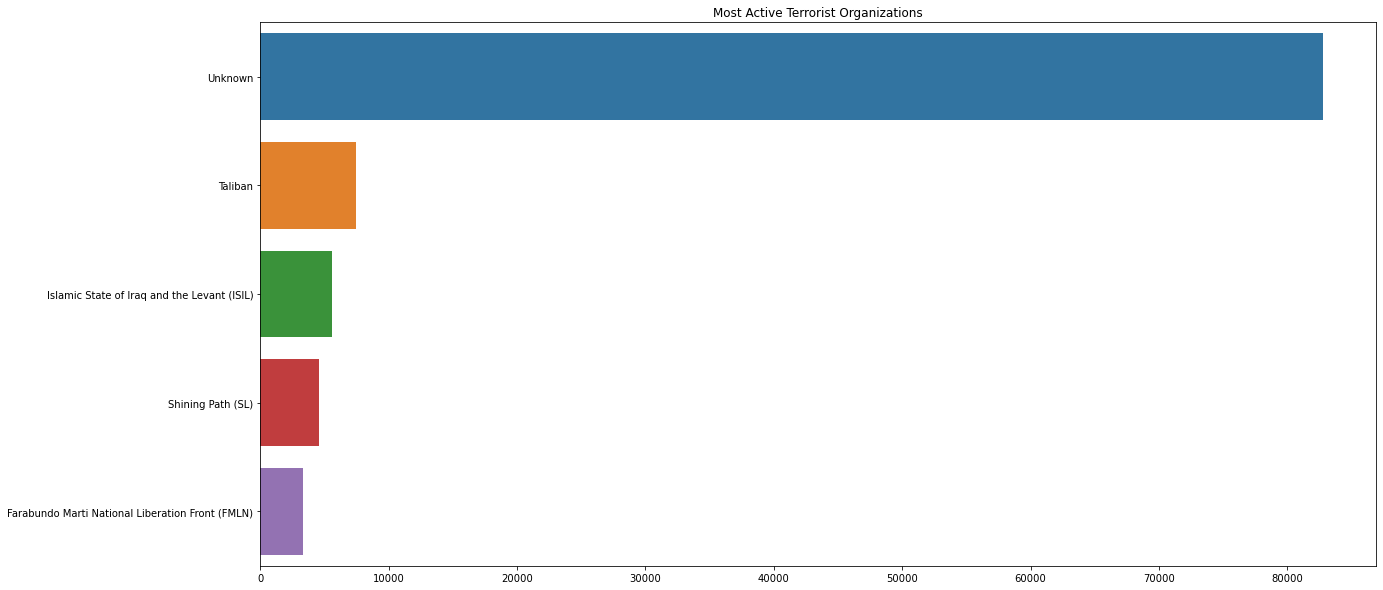

In [48]:
plt.subplots(figsize = (20,10))
sns.barplot(y=data['Group'].value_counts()[:5].index, x=data['Group'].value_counts()[:5].values, palette='tab10')
plt.title('Most Active Terrorist Organizations')

# Conclusion Most Active Terrorism Organization is Unknown ,Taliban


# thanking you